In [54]:
# Importing the needed libraries
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import time
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from itertools import combinations

### Task:
1. Find a need: a data driven question
2. Data: information about the data, import, scrub
3. Plan
4. Experiment
5. Communicate

#### 1. Find a need: Data driven question
* Can temperatures in Bangor, North Wales be predicted given historical meteorological data?

#### 2. Data: 
The data is downloaded from soda.pro

#### 2.1.  Obtaining the Data, importing the data, information about the data and Scrubbing

* Importing the data set

In [2]:
# Load the data
data = pd.read_csv('Bangor_met_data.csv', parse_dates=['Date'], index_col=['Date'])
data.head()

,UT time,Temperature,Relative Humidity,Pressure,Wind speed,Wind direction,Rainfall,Snowfall,Snow depth,Short-wave irradiation
Date,,,,,,,,,,
1980-01-01,1:00,276.73,66.18,1001.16,1.82,341.66,0.000815,0.0,0.000316,0.0
1980-01-01,2:00,276.53,67.78,1001.00,1.95,338.51,0.000864,0.0,0.000316,0.0
1980-01-01,3:00,276.37,69.46,1001.09,2.13,338.85,0.001435,0.0,0.000316,0.0
1980-01-01,4:00,276.35,70.44,1001.07,2.26,345.52,0.001537,0.0,0.000316,0.0
1980-01-01,5:00,276.32,71.17,1000.87,2.45,357.11,0.002162,0.0,0.000316,0.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 374016 entries, 1980-01-01 to 2022-08-31
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   UT time                 374016 non-null  object 
 1   Temperature             374016 non-null  float64
 2   Relative Humidity       374016 non-null  float64
 3   Pressure                374016 non-null  float64
 4   Wind speed              374016 non-null  float64
 5   Wind direction          374016 non-null  float64
 6   Rainfall                374016 non-null  float64
 7   Snowfall                374016 non-null  float64
 8   Snow depth              374016 non-null  float64
 9   Short-wave irradiation  374016 non-null  float64
dtypes: float64(9), object(1)
memory usage: 31.4+ MB


   * The data consists of 10 columns with only UT time is an object data type, all other variables are float data type

#### * Scrubbing
 The date column has been parsed as the index to enable daily, monthly, yearly averaging.<br>
* The data is filtered from 1980 to start from 2016 daily readings.<br>
* The data is averaged daily dataframe.resample method

In [4]:

# Set the start date as January 1, 2016
start_date = pd.Timestamp('2016-01-01')

# Calculate the end date (last date in the DataFrame)
end_date = data.index[-1]

# Filter the DataFrame to select data from January 1, 2012, to the last date
data_filtered = data.loc[start_date:end_date]
# data
data_filtered


,UT time,Temperature,Relative Humidity,Pressure,Wind speed,Wind direction,Rainfall,Snowfall,Snow depth,Short-wave irradiation
Date,,,,,,,,,,
2016-01-01,1:00,278.19,75.61,1006.60,6.07,241.02,0.000154,0.0,0.0,0.0000
2016-01-01,2:00,278.00,76.01,1006.83,5.68,234.18,0.000129,0.0,0.0,0.0000
2016-01-01,3:00,277.85,75.87,1006.96,5.28,224.60,0.000063,0.0,0.0,0.0000
2016-01-01,4:00,277.81,75.83,1006.93,5.05,211.21,0.000066,0.0,0.0,0.0000
2016-01-01,5:00,278.09,76.17,1006.80,5.12,193.82,0.000174,0.0,0.0,0.0000
...,...,...,...,...,...,...,...,...,...,...
2022-08-31,20:00,290.58,75.60,1014.14,4.96,70.12,0.000849,0.0,0.0,0.0814
2022-08-31,21:00,290.24,77.73,1014.34,5.47,78.78,0.000500,0.0,0.0,0.0000
2022-08-31,22:00,289.72,80.38,1014.46,5.86,85.72,0.000458,0.0,0.0,0.0000


In [32]:
# Finding the daily average (reduces the data points and eliminates the UT time by averaging it to become daily average)
df=data_filtered.resample('d').mean()
df

,Temperature,Relative Humidity,Pressure,Wind speed,Wind direction,Rainfall,Snowfall,Snow depth,Short-wave irradiation
Date,,,,,,,,,
2016-01-01,279.056250,84.407083,999.385417,9.205000,151.812917,0.171741,0.0,0.0,12.070392
2016-01-02,281.256250,92.020833,985.187083,5.592500,146.991250,0.347717,0.0,0.0,9.193071
2016-01-03,280.690000,88.398750,974.312500,6.532917,174.225833,0.339504,0.0,0.0,13.339463
2016-01-04,280.870833,90.526667,966.252500,4.925000,152.016250,0.287503,0.0,0.0,13.939758
2016-01-05,280.462917,88.226250,971.675417,2.636250,97.020000,0.162614,0.0,0.0,17.970717
...,...,...,...,...,...,...,...,...,...
2022-08-27,289.231667,78.407083,1009.695417,3.284167,130.521250,0.013906,0.0,0.0,209.849875
2022-08-28,289.685417,82.633750,1011.447083,2.119167,103.772083,0.023051,0.0,0.0,75.576708
2022-08-29,290.465000,79.204583,1013.368333,4.484167,85.590000,0.012687,0.0,0.0,221.361617


In [6]:
# Further info
df.describe()

,Temperature,Relative Humidity,Pressure,Wind speed,Wind direction,Rainfall,Snowfall,Snow depth,Short-wave irradiation
count,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000
mean,283.668206,83.745639,1003.197284,5.973598,203.824928,0.133965,0.001516,0.000259,140.096424
std,4.067010,5.504270,11.555538,2.736692,71.756532,0.198786,0.011281,0.002278,100.717706
min,271.269167,63.578333,960.992917,0.855833,14.254583,0.000000,0.000000,0.000000,4.122133
25%,280.385000,80.161875,996.180000,3.834792,162.340417,0.009476,0.000000,0.000000,44.323994
50%,283.420000,84.245833,1004.587917,5.602083,216.012917,0.052744,0.000000,0.000000,124.493175
75%,287.185417,87.740625,1011.105625,7.729375,253.561458,0.180283,0.000000,0.000000,223.504352
max,294.184583,96.170833,1034.896250,16.324167,356.137500,1.667666,0.214030,0.062517,359.699633


#### Check for Missing Values

In [7]:
df.isnull().sum()

Temperature               0
Relative Humidity         0
Pressure                  0
Wind speed                0
Wind direction            0
Rainfall                  0
Snowfall                  0
Snow depth                0
Short-wave irradiation    0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2435 entries, 2016-01-01 to 2022-08-31
Freq: D
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature             2435 non-null   float64
 1   Relative Humidity       2435 non-null   float64
 2   Pressure                2435 non-null   float64
 3   Wind speed              2435 non-null   float64
 4   Wind direction          2435 non-null   float64
 5   Rainfall                2435 non-null   float64
 6   Snowfall                2435 non-null   float64
 7   Snow depth              2435 non-null   float64
 8   Short-wave irradiation  2435 non-null   float64
dtypes: float64(9)
memory usage: 190.2 KB


##### All the 9 column features that are used are of float data type with 2435 rows

### 3.  Plan
1. Regression
    1. Feature Selection using Exhaustive feature selection and Recursive feature Selection

    2. Choose 3 models to use<br>
        i. Linear regression<br>
        ii. Random Forest regression<br>
        iii. Support Vector Machine<br>
    3. Streaming Data Analysis
 2. Classification 

### 4. Experiment

### 4.1a. performing a Linear Regression

In [9]:
# Split the data into features (X) and target (y)
X = df.drop('Temperature', axis=1)
y = df['Temperature']

# Create and train the linear regression model
lr_model = LinearRegression()
start_time = time.time()
lr_model.fit(X, y)
end_time = time.time()

# Make predictions on the test set
y_pred = lr_model.predict(X)

# Evaluate the model
lr_rmse = np.sqrt(mean_squared_error(y, y_pred))
lr_r2 = r2_score(y, y_pred)

# Measure the time taken by the model
lr_time_taken = end_time - start_time

print(f"Time taken: {lr_time_taken:.2f} seconds")

# Perform cross-validation
scores = cross_val_score(lr_model, X, y, cv=5, scoring='r2')
lr_Mean_cv_r2 = scores.mean()
# Print the cross-validation scores
print("Cross-Validation R2 Scores:", scores)
print("Mean R2 Score:", lr_Mean_cv_r2)
print(f'RMSE: {lr_rmse:.2f}')
print(f'R2 Score: {lr_r2:.2f}')

Time taken: 0.00 seconds
Cross-Validation R2 Scores: [ 0.41097136 -0.06137013  0.44209836  0.41404993  0.31710804]
Mean R2 Score: 0.3045715126844045
RMSE: 2.92
R2 Score: 0.49


#### 4.1b. Perform Exhaustive Feature Selection on Linear Regression model:
Aim: To see the best combination of variables or single variable required to predict temperature

In [10]:
def exhaustive_feature_selection(X, y):
    best_r2 = -1
    best_features = []
    features = X.columns

    # Generate all possible subsets of features
    feature_subsets = [subset for r in range(1, len(features) + 1) for subset in combinations(features, r)]

    for subset in feature_subsets:
        # Train the linear regression model with the current subset of features
        lr_model = LinearRegression()
        start_time = time.time()
        lr_model.fit(X[list(subset)], y)
        end_time = time.time()

        # Make predictions on the entire dataset
        y_pred = lr_model.predict(X[list(subset)])

        # Evaluate the model
        r2 = r2_score(y, y_pred)
        efs_lr_rmse = np.sqrt(mean_squared_error(y, y_pred))

        # Update the best R2 score and best features if the current model performs better
        if r2 > best_r2:
            best_r2 = r2
            best_features = subset

    return best_features, best_r2, efs_lr_rmse, start_time, end_time

best_features, best_r2, efs_lr_rmse, start_time, end_time = exhaustive_feature_selection(X, y)

# Measure the time taken by the model
efs_lr_time_taken = end_time - start_time

print(f"Time taken: {efs_lr_time_taken:.2f} seconds")
# Perform cross-validation
scores = cross_val_score(lr_model, X, y, cv=5, scoring='r2')
efs_lr_cv_r2 = scores.mean()
# Print the cross-validation scores
print("Cross-Validation R2 Scores:", scores)
print("Mean R2 Score:", efs_lr_cv_r2 )
print(f"Best Features: {best_features}")
print(f"RMSE: {efs_lr_rmse:.2f}")
print(f"Best R2 Score: {best_r2:.2f}")


Time taken: 0.00 seconds
Cross-Validation R2 Scores: [ 0.41097136 -0.06137013  0.44209836  0.41404993  0.31710804]
Mean R2 Score: 0.3045715126844045
Best Features: ('Relative Humidity', 'Pressure', 'Wind speed', 'Wind direction', 'Rainfall', 'Snowfall', 'Snow depth', 'Short-wave irradiation')
RMSE: 2.92
Best R2 Score: 0.49


Result: This returns all variables with the same R2 score 0.49

#### 4.1c. Perform Recursive Feature Selection (RFS) on Linear Regression model

In [11]:
# Create the linear regression model
lr_model = LinearRegression()

# Perform RFE number of Features to select is None
rfe_selector = RFE(estimator=lr_model, n_features_to_select=None, step=1)
rfe_selector.fit(X, y)

# Get the selected features
selected_features = X.columns[rfe_selector.support_]

print(f"Selected Features: {selected_features}")

# Train the linear regression model on the selected features
start_time = time.time()
lr_model.fit(X[selected_features], y)
end_time = time.time()

# Make predictions on the entire dataset using the selected features
y_pred = lr_model.predict(X[selected_features])

# Calculate RMSE and R2 score
rfs_lr_rmse = np.sqrt(mean_squared_error(y, y_pred))
rfs_lr_r2 = r2_score(y, y_pred)

# Measure the time taken by the model
rfs_lr_time_taken = end_time - start_time
print(f"Time taken: {rfs_lr_time_taken:.2f} seconds")

# Perform cross-validation
scores = cross_val_score(lr_model, X, y, cv=5, scoring='r2')
rfs_lr_cv_r2 = scores.mean()

# Print the cross-validation scores
print("Cross-Validation R2 Scores:", scores)
print("Mean R2 Score:", rfs_lr_cv_r2 )


#Scores
print(f"RMSE: {rfs_lr_rmse:.2f}")
print(f"R2 Score: {rfs_lr_r2:.2f}")


Selected Features: Index(['Wind speed', 'Rainfall', 'Snowfall', 'Snow depth'], dtype='object')
Time taken: 0.00 seconds
Cross-Validation R2 Scores: [ 0.41097136 -0.06137013  0.44209836  0.41404993  0.31710804]
Mean R2 Score: 0.3045715126844045
RMSE: 3.79
R2 Score: 0.13


Result: Selects four columns when set to None, there is a noticeable drop in metrics value from 0.49 to 0.13(mse)

#### 4.1d Set the number of features in recursive model to 6

In [12]:
# Create the linear regression model
lr_model = LinearRegression()

# Perform RFE f
rfe_selector = RFE(estimator=lr_model, n_features_to_select=6, step=1)
rfe_selector.fit(X, y)

# Get the selected features
selected_features = X.columns[rfe_selector.support_]

print(f"Selected Features: {selected_features}")

# Train the linear regression model on the selected features
start_time = time.time()
lr_model.fit(X[selected_features], y)
end_time = time.time()

# Make predictions on the entire dataset using the selected features
y_pred = lr_model.predict(X[selected_features])

# Calculate RMSE and R2 score
rfs6_lr_rmse = np.sqrt(mean_squared_error(y, y_pred))
rfs6_lr_r2 = r2_score(y, y_pred)

# Measure the time taken by the model
rfs6_lr_time_taken = end_time - start_time
print(f"Time taken: {rfs6_lr_time_taken:.2f} seconds")

# Perform cross-validation
scores = cross_val_score(lr_model, X, y, cv=5, scoring='r2')
rfs6_lr_cv_r2 = scores.mean()
# Print the cross-validation scores
print("Cross-Validation R2 Scores:", scores)
print("Mean R2 Score:", rfs6_lr_cv_r2)


print(f"RMSE: {rfs6_lr_rmse:.2f}")
print(f"R2 Score: {rfs6_lr_r2:.2f}")

Selected Features: Index(['Relative Humidity', 'Wind speed', 'Rainfall', 'Snowfall', 'Snow depth',
       'Short-wave irradiation'],
      dtype='object')
Time taken: 0.00 seconds
Cross-Validation R2 Scores: [ 0.41097136 -0.06137013  0.44209836  0.41404993  0.31710804]
Mean R2 Score: 0.3045715126844045
RMSE: 2.92
R2 Score: 0.48


**Result:
    The Recursive Feature selection allows the number of features to be specified and brings the best combinations.<br>
    When Set to 6 number of features, the metrics result (0.48) does not reduce much from when 8 features (0.49) with the best performance is selected<br>
    So 6 Features is recommended.**

### 4.2a. Random Forest Model

In [13]:
# 1. performing a Random Forest Regressioned Error(RMSE)
# Create and train the random forest regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
start_time = time.time()
rf_model.fit(X, y)
end_time = time.time()
# Make predictions on the entire dataset
y_pred = rf_model.predict(X)

# Measure the time taken by the model
rf_time_taken = end_time - start_time
print(f"Time taken: {rf_time_taken:.2f} seconds")

# Perform cross-validation
scores = cross_val_score(rf_model, X, y, cv=5, scoring='r2')
rf_cv_r2 = scores.mean()
# Print the cross-validation scores
print("Cross-Validation R2 Scores:", scores)
print("Mean R2 Score:", rf_cv_r2)

# Evaluate the model
rf_rmse = np.sqrt(mean_squared_error(y, y_pred))
rf_r2 = r2_score(y, y_pred)

print(f'RMSE: {rf_rmse:.2f}')
print(f'R2 Score: {rf_r2:.2f}')

Time taken: 2.01 seconds
Cross-Validation R2 Scores: [0.56126898 0.67335545 0.6001427  0.53719947 0.42656619]
Mean R2 Score: 0.5597065595334818
RMSE: 0.91
R2 Score: 0.95


**The performance evaluation shows high value for R2 but the cross validation mean score (0.55) shows the performance on unseen data and ability to generalise still a good score.**

#### 4.2b. Perform RFE on Random Forest model
Aim: To choose fewer features

In [14]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
start_time = time.time()
rf_model.fit(X, y)
end_time = time.time()

# Perform recursive feature elimination
rfe = RFE(estimator=rf_model, n_features_to_select=None, step=1)
rfe.fit(X, y)

# Get the selected features
selected_features = X.columns[rfe.support_]

# Train the RandomForestRegressor using only the selected features
rf_model.fit(X[selected_features], y)

# Make predictions on the entire dataset using the selected features
y_pred = rf_model.predict(X[selected_features])

# Evaluate the model
rf_rfs_rmse = np.sqrt(mean_squared_error(y, y_pred))
rf_rfs_r2 = r2_score(y, y_pred)

# Measure the time taken by the model
rf_rfs_time_taken = end_time - start_time
print(f"Time taken: {rf_rfs_time_taken:.2f} seconds")
# Perform cross-validation
scores = cross_val_score(rf_model, X, y, cv=5, scoring='r2')
rf_rfs_cv_r2 = scores.mean()
# Print the cross-validation scores
print("Cross-Validation R2 Scores:", scores)
print("Mean R2 Score:")



print(f'Selected Features: {selected_features}')
print(f'RMSE: {rf_rfs_rmse:.2f}')
print(f'R2 Score: {rf_rfs_r2:.2f}')

Time taken: 1.87 seconds
Cross-Validation R2 Scores: [0.56126898 0.67335545 0.6001427  0.53719947 0.42656619]
Mean R2 Score:
Selected Features: Index(['Wind direction', 'Rainfall', 'Snowfall', 'Short-wave irradiation'], dtype='object')
RMSE: 1.03
R2 Score: 0.94


**Got reduced columns, same mean cross validation score 0.55<br>
The more the columns, the better the performance but with only little difference.**

#### 42c. Experiment use Exhaustive Feature Selection on Random Forest Regression model:

In [15]:
def exhaustive_feature_selection(X, y):
    best_r2 = -1
    best_features = []
    features = X.columns

    # Generate all possible subsets of features
    feature_subsets = [subset for r in range(1, len(features) + 1) for subset in combinations(features, r)]

    for subset in feature_subsets:
        # Train the random forest regression model with the current subset of features
        rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
        rf_model.fit(X[list(subset)], y)

        # Make predictions on the entire dataset
        y_pred = rf_model.predict(X[list(subset)])

        # Evaluate the model
        r2 = r2_score(y, y_pred)

        # Update the best R2 score and best features if the current model performs better
        if r2 > best_r2:
            best_r2 = r2
            best_features = subset

    return best_features, best_r2

start_time = time.time()
best_features, best_r2 = exhaustive_feature_selection(X, y)
end_time = time.time()

time_taken = end_time - start_time

print(f"Best Features: {best_features}")
print(f"Best R2 Score: {best_r2:.2f}")
print(f"Time taken: {time_taken:.2f} seconds")

Best Features: ('Relative Humidity', 'Pressure', 'Wind speed', 'Wind direction', 'Rainfall', 'Snowfall', 'Snow depth', 'Short-wave irradiation')
Best R2 Score: 0.95
Time taken: 354.65 seconds


This failed as the process took time and was cancelled

### 4.3a. Support Vector Regression

In [16]:
# Create and train the support vector regression model
svr_model = SVR(kernel='linear')

start_time = time.time()
svr_model.fit(X, y)
end_time = time.time()

# Make predictions on the entire dataset
y_pred = svr_model.predict(X)

# Evaluate the model
svr_rmse = np.sqrt(mean_squared_error(y, y_pred))
svr_r2 = r2_score(y, y_pred)

# Measure the time taken by the model
svr_time_taken = end_time - start_time

print(f"Time taken: {svr_time_taken:.2f} seconds")
# Perform cross-validation
scores = cross_val_score(rf_model, X, y, cv=5, scoring='r2')
svr_cv_r2 = scores.mean()
# Print the cross-validation scores
print("Cross-Validation R2 Scores:", scores)
print("Mean R2 Score:", svr_cv_r2)

print(f'RMSE: {svr_rmse:.2f}')
print(f'R2 Score: {svr_r2:.2f}')

Time taken: 45.92 seconds
Cross-Validation R2 Scores: [0.56126898 0.67335545 0.6001427  0.53719947 0.42656619]
Mean R2 Score: 0.5597065595334818
RMSE: 3.00
R2 Score: 0.46


#### 4.3b. Perform Recursive Feature Selection on SVR model

In [17]:
# Create the SVR model
svr_model = SVR(kernel='linear')

# Perform RFE for feature selection
rfe_selector = RFE(estimator=svr_model, n_features_to_select=None, step=1)
X_selected = rfe_selector.fit_transform(X, y)

# Get the selected feature indices
selected_feature_indices = rfe_selector.get_support(indices=True)

# Get the selected feature names
selected_feature_names = X.columns[selected_feature_indices]

print(f"Selected Features: {selected_feature_names}")

# Train the SVR model on the selected features
start_time = time.time()
svr_model.fit(X_selected, y)
end_time = time.time()

# Make predictions on the entire dataset using the selected features
y_pred = svr_model.predict(X_selected)

# Calculate RMSE and R2 score
svr_rfs_rmse = mean_squared_error(y, y_pred, squared=False)
svr_rfs_r2 = r2_score(y, y_pred)
# Perform cross-validation
scores = cross_val_score(rf_model, X, y, cv=5, scoring='r2')
svr_rfs_cv_r2 = scores.mean()

# Measure the time taken by the model
svr_rfs_time_taken = end_time - start_time

print(f"Time taken: {time_taken:.2f} seconds")
# Print the cross-validation scores
print("Cross-Validation R2 Scores:", scores)
print("Mean R2 Score:", svr_rfs_cv_r2)
print(f"RMSE: {svr_rfs_rmse:.2f}")
print(f"R2 Score: {svr_rfs_r2:.2f}")

Selected Features: Index(['Wind speed', 'Rainfall', 'Snowfall', 'Snow depth'], dtype='object')
Time taken: 354.65 seconds
Cross-Validation R2 Scores: [0.56126898 0.67335545 0.6001427  0.53719947 0.42656619]
Mean R2 Score: 0.5597065595334818
RMSE: 3.90
R2 Score: 0.08


#### Creating a dataframe of the Results

In [28]:
import pandas as pd

data = {
    "Processes": [
        "LR",
        "EFS_LR",
        "RFS_LR",
        "6_RFS_LR",
        "RF",
        "RFS_RF",
        "SVM",
        "RFS_SVM",
    ],
    "Time Taken": [
        lr_time_taken,
        efs_lr_time_taken,
        rfs_lr_time_taken,
        rfs6_lr_time_taken,
        rf_time_taken,
        rf_rfs_time_taken,
        svr_time_taken,
        svr_rfs_time_taken,
    ],
    "CV R2": [
        lr_Mean_cv_r2,
        efs_lr_cv_r2,
        rfs_lr_cv_r2,
        rfs6_lr_cv_r2,
        rf_cv_r2,
        rf_rfs_cv_r2,
        svr_cv_r2,
        svr_rfs_cv_r2,
    ],
    "RMSE": [
        lr_rmse,
        efs_lr_rmse,
        rfs_lr_rmse,
        rfs6_lr_rmse,
        rf_rmse,
        rf_rfs_rmse,
        svr_rmse,
        svr_rfs_rmse,
    ],
    "R2": [
        lr_r2,
        best_r2,
        rfs_lr_r2,
        rfs6_lr_r2,
        rf_r2,
        rf_rfs_r2,
        svr_r2,
        svr_rfs_r2,
    ],
    "No of Features": [
        "All",
        "All",
        "4 features",
        "6 features ('Relative Humidity', 'Wind speed', 'Rainfall', 'Snowfall', 'Snow depth', 'Short-wave irradiation')",
        "All",
        "4 features ('Wind direction', 'Rainfall', 'Snowfall', 'Short-wave irradiation')",
        "All",
        "4 features ('Wind speed', 'Rainfall', 'Snowfall', 'Snow depth')",
    ],
}

df1 = pd.DataFrame(data)
df1


,Processes,Time Taken,CV R2,RMSE,R2,No of Features
0,LR,0.003997,0.304572,2.917684,0.485122,All
1,EFS_LR,0.003117,0.304572,2.917684,0.949851,All
2,RFS_LR,0.004949,0.304572,3.789957,0.131247,4 features
3,6_RFS_LR,0.004995,0.304572,2.920584,0.484098,"6 features ('Relative Humidity', 'Wind speed',..."
4,RF,2.007098,0.559707,0.910574,0.949851,All
5,RFS_RF,1.868017,0.559707,1.028724,0.935993,"4 features ('Wind direction', 'Rainfall', 'Sno..."
6,SVM,45.921270,0.559707,2.995836,0.457170,All
7,RFS_SVM,0.301599,0.559707,3.902800,0.078744,"4 features ('Wind speed', 'Rainfall', 'Snowfal..."


#### Visualisations

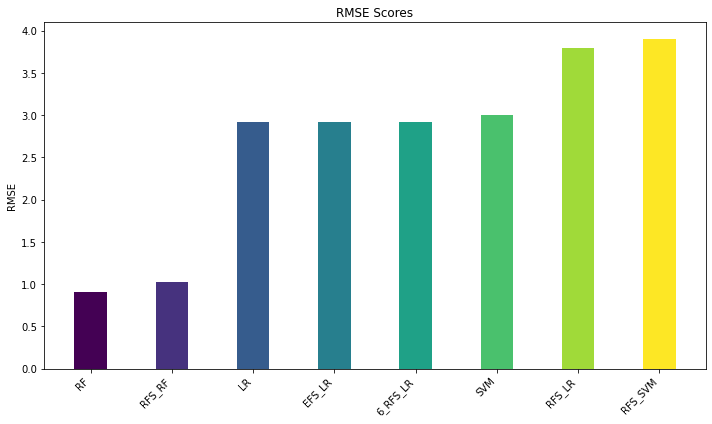

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Sort the DataFrame by RMSE scores in ascending order
sorted_data = df1.sort_values(by="RMSE")

num_processes = len(sorted_data["Processes"])

# Set the x-axis tick locations
x_locs = np.arange(num_processes)

# Generate a colormap with a range of colors based on the number of processes
colors = cm.viridis(np.linspace(0, 1, num_processes))

fig, ax = plt.subplots(figsize=(10, 6))

# Plot RMSE scores in a bar chart with different colors
ax.bar(x_locs, sorted_data["RMSE"], width=0.4, color=colors)

ax.set_xticks(x_locs)
ax.set_xticklabels(sorted_data["Processes"], rotation=45, ha="right")
ax.set_title("RMSE Scores")
ax.set_ylabel("RMSE")

plt.tight_layout()
plt.show()


**Insight to Plot: The RF and Recursive Feature Selection is preferred as the lower the Rmse the better.**

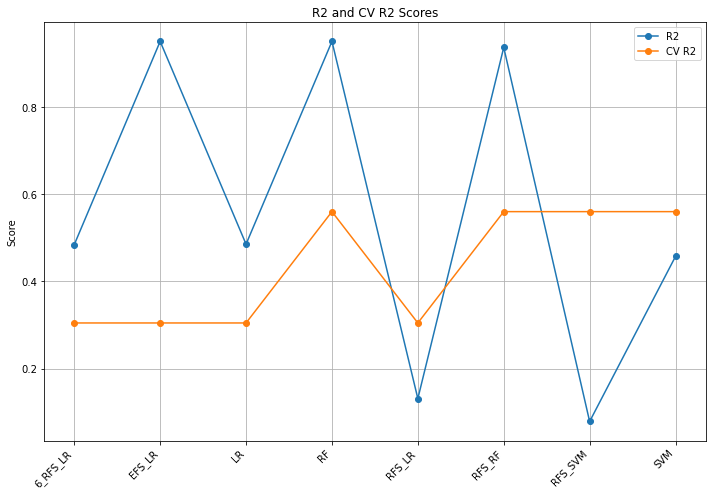

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Sort the DataFrame by Processes
sorted_data = df1.sort_values(by="Processes")

num_processes = len(sorted_data["Processes"])

# Set the x-axis tick locations
x_locs = np.arange(num_processes)

fig, ax = plt.subplots(figsize=(10, 7))

# Plot R2 scores in a line chart
ax.plot(x_locs, sorted_data["R2"], marker="o", label="R2")

# Plot CV R2 scores in a line chart
ax.plot(x_locs, sorted_data["CV R2"], marker="o", label="CV R2")

ax.set_xticks(x_locs)
ax.set_xticklabels(sorted_data["Processes"], rotation=45, ha="right")
ax.set_title("R2 and CV R2 Scores")
ax.set_ylabel("Score")
ax.legend()
plt.grid()
plt.tight_layout()
plt.show()


**Insight to the plot: The Random forest performed well according to R2 and cross validation mean r2.
The Recursive Feature selection on Random Forest is recommended because the features are reduced to: 'Wind direction', 'Rainfall', 'Snowfall', 'Short-wave irradiation'**

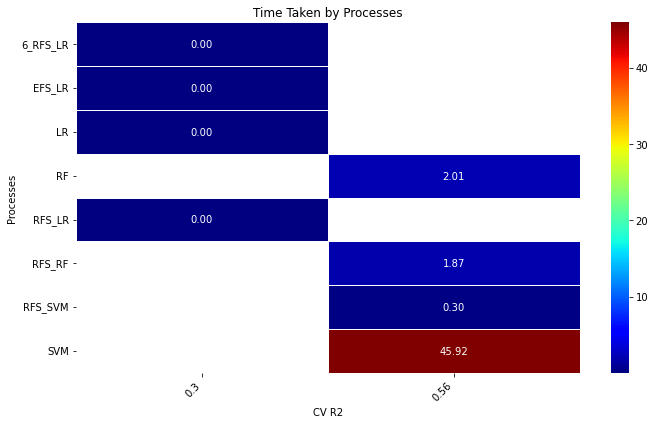

In [31]:
# Sort the DataFrame by time taken in ascending order
sorted_data = df1.sort_values(by="Time Taken")

# Prepare data for heatmap
heatmap_data = sorted_data.pivot_table(index="Processes", columns="CV R2", values="Time Taken")

# Round the columns to 2 decimal places
heatmap_data.columns = [round(col, 2) for col in heatmap_data.columns]

# Create a heatmap
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="jet", ax=ax, linewidths=0.5)

# Set the title and labels
ax.set_title("Time Taken by Processes")
ax.set_xlabel("CV R2")
ax.set_ylabel("Processes")

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()


**Insight to the plot:
SVM model took longer to predict than the other processes.**

#### Streaming Data

Running Error: 2.84, True Error: 3.15
Running Error: 0.09, True Error: 0.92
------------------------------------------------
Running Error: 2.84, True Error: 3.07
Running Error: 0.09, True Error: 3.64
------------------------------------------------
Running Error: 2.84, True Error: 1.54
Running Error: 0.09, True Error: 1.33
------------------------------------------------
Running Error: 2.85, True Error: 3.67
Running Error: 0.09, True Error: 2.60
------------------------------------------------
Running Error: 2.84, True Error: 3.46
Running Error: 0.09, True Error: 2.88
------------------------------------------------
Running Error: 2.84, True Error: 1.27
Running Error: 0.09, True Error: 1.15
------------------------------------------------
Running Error: 2.84, True Error: 3.99
Running Error: 0.09, True Error: 2.82
------------------------------------------------
Running Error: 2.84, True Error: 3.53
Running Error: 0.08, True Error: 3.90
------------------------------------------------


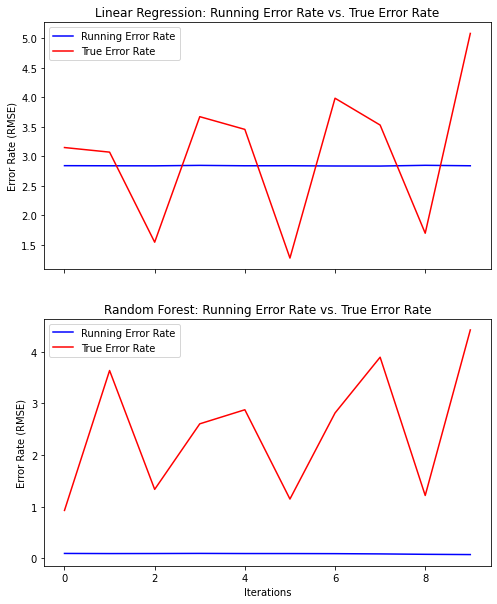

In [53]:
def streaming_data(df, chunk_size=245):
    for i in range(0, len(df), chunk_size):
        chunk = df.iloc[i:i + chunk_size]
        train = chunk[:-chunk_size // 5]
        test = chunk[-chunk_size // 5:]
        yield train, test
# Set the random seed
np.random.seed(42)
random.seed(42)
lr_running_error = []
lr_true_error = []

rf_running_error = []
rf_true_error = []

for train_chunk, test_chunk in streaming_data(df):
    streamed_df = pd.concat([streamed_df, train_chunk], ignore_index=True)
    X_train = streamed_df.drop('Temperature', axis=1)
    y_train = streamed_df['Temperature']

    X_test = test_chunk.drop('Temperature', axis=1)
    y_test = test_chunk['Temperature']
    

    for model, running_error, true_error in [(lr_model, lr_running_error, lr_true_error),
                                             (rf_model, rf_running_error, rf_true_error)]:

        model.fit(X_train, y_train)
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        running_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
        true_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
        running_error.append(running_rmse)
        true_error.append(true_rmse)

        print(f"Running Error: {running_rmse:.2f}, True Error: {true_rmse:.2f}")
    print("------------------------------------------------")

# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(8, 10), sharex=True)

# Plot the running error rate and true error rate for Linear Regression
axes[0].plot(lr_running_error, label='Running Error Rate', color='blue')
axes[0].plot(lr_true_error, label='True Error Rate', color='red')
axes[0].set_ylabel('Error Rate (RMSE)')
axes[0].legend()
axes[0].set_title('Linear Regression: Running Error Rate vs. True Error Rate')

# Plot the running error rate and true error rate for Random Forest
axes[1].plot(rf_running_error, label='Running Error Rate', color='blue')
axes[1].plot(rf_true_error, label='True Error Rate', color='red')
axes[1].set_xlabel('Iterations')
axes[1].set_ylabel('Error Rate (RMSE)')
axes[1].legend()
axes[1].set_title('Random Forest: Running Error Rate vs. True Error Rate')

# Show the plot
plt.show()


#### Analysis:

For both models, the Running Error remains relatively stable or decreases slightly over time, indicating that the models are learning from the data and improving their performance on the training set.
The True Error for the Linear Regression model fluctuates and doesn't show a clear decreasing trend, indicating that the model may not generalize well to new data.
The Random Forest model shows a decreasing trend in the True Error rate, indicating that it is better at generalizing to new data compared to the Linear Regression model. It's worth noting that there is an increase in True Error in iteration 2 and 8, but overall, the error tends to decrease over time.

## Conclusion 
**The Random Forest for both Major experiments: The normal regression models and the streaming data analysis, the random forest is the best model out of all attempted.** 